### Comparing loss/validation curves and final scores across experiments

TODO: 
   - test multi-task setups appear correctly (not urgent ...) 

In [1]:
import pandas as pds
import os.path
from glob import glob
import altair as alt
import json
%matplotlib inline

from collect_scores import config, tasks as seg_tasks, pdtb_tasks, models, collect_final_result
# only for testing, not really needed here
from collect_scores import retrieve_expe_dir, get_taskname_from_dir, collect_expe_results, get_last_run, get_log

/home/muller/miniconda3/envs/jiant3.8/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
RUN_DIR = "../runs"

config["exp_dir"] = RUN_DIR
config["tasks"] =  seg_tasks | pdtb_tasks
TEST_TASK = "deu_rst_pcc"



In [3]:
config

{'exp_dir': '../runs',
 'tasks': {'deu_rst_pcc',
  'eng_dep_scidtb',
  'eng_pdtb_pdtb',
  'eng_rst_gum',
  'eng_rst_rstdt',
  'eng_sdrt_stac',
  'eus_rst_ert',
  'fas_rst_prstc',
  'fra_sdrt_annodis',
  'ita_pdtb_luna',
  'nld_rst_nldt',
  'por_pdtb_crpc',
  'por_rst_cstn',
  'rus_rst_rrt',
  'spa_rst_rststb',
  'spa_rst_sctb',
  'tha_pdtb_tdtb',
  'tur_pdtb_tdb',
  'zho_dep_scidtb',
  'zho_pdtb_cdtb',
  'zho_rst_gcdt',
  'zho_rst_sctb'},
 'models': {'bert': 'bert-base-multilingual-uncased',
  'roberta': 'xlm-roberta-base',
  'roberta-large': 'xlm-roberta-large'}}

In [5]:
val_scores = collect_final_result(config["tasks"],["roberta","roberta-large","bert"],config,task_type="split",best_metadata=False)
# this should be read from args/config; hardcoded for now
val_scores["real_batch_size"] = val_scores["real_batch_size"].astype(int)

val_scores["epochs"].replace(to_replace=[None],value=30,inplace=True)
val_scores["epochs"] = val_scores["epochs"].astype(int)
# default -> replace
val_scores["max_seq_length"].replace([None],180,inplace=True)

val_scores["patience"] = 10
#val_scores["eval steps"] = 500
val_scores["setup"] = "jiant single"
val_scores["train corpus"] = val_scores["task"]
################
val_scores = val_scores.reset_index(drop=True)
val_scores.sort_values(by=["task","model","real_batch_size"])


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
columns = ["train corpus","task","precision","recall","f1","model","setup","real_batch_size","learning_rate","freeze_layers","epochs","patience","max_seq_length"]

formatter = formatter={('learning_rate'): '{:.2g}'.format,
                                   ('f1'):'{:.2%}'.format,
                                   ('precision'):'{:.2%}'.format,
                                   ('recall'):'{:.2%}'.format,
                          }

scores = val_scores[~val_scores["task"].str.contains("pdtb")].sort_values(by=["task","model"])
#scores[].to_latex())
#scores[columns].to_csv("scores.csv",index=False)
scores[columns].style.format(formatter=formatter)

,train corpus,task,precision,recall,f1,model,setup,real_batch_size,learning_rate,freeze_layers,epochs,patience,max_seq_length
6,deu_rst_pcc,deu_rst_pcc,94.57%,94.91%,94.74%,roberta,jiant single,64,1e-05,,30,10,180
7,deu_rst_pcc,deu_rst_pcc,96.24%,93.09%,94.64%,roberta,jiant single,64,1e-05,0-7,30,10,180
8,deu_rst_pcc,deu_rst_pcc,96.34%,95.64%,95.99%,roberta-large,jiant single,4,1e-05,0-11,30,10,180
43,eng_dep_scidtb,eng_dep_scidtb,94.21%,96.95%,95.56%,roberta,jiant single,64,1e-05,,30,10,180
44,eng_dep_scidtb,eng_dep_scidtb,93.77%,95.40%,94.58%,roberta,jiant single,64,1e-05,0-7,30,10,180
45,eng_dep_scidtb,eng_dep_scidtb,94.48%,96.38%,95.42%,roberta-large,jiant single,4,1e-05,0-11,30,10,180
22,eng_rst_gum,eng_rst_gum,82.75%,82.57%,82.66%,roberta,jiant single,64,1e-05,,30,10,180
23,eng_rst_gum,eng_rst_gum,83.28%,80.71%,81.97%,roberta,jiant single,64,1e-05,,30,10,180
24,eng_rst_gum,eng_rst_gum,82.02%,82.29%,82.16%,roberta,jiant single,64,1e-05,0-7,30,10,180
25,eng_rst_gum,eng_rst_gum,83.99%,83.87%,83.93%,roberta-large,jiant single,4,1e-05,0-11,30,10,180


In [15]:
scores[columns].style.bar(subset=['f1'], color='green')

,train corpus,task,precision,recall,f1,model,setup,real_batch_size,learning_rate,freeze_layers,epochs,patience,max_seq_length
6,deu_rst_pcc,deu_rst_pcc,0.945652,0.949091,0.947368,roberta,jiant single,64,0.000010,,30,10,180
7,deu_rst_pcc,deu_rst_pcc,0.962406,0.930909,0.946396,roberta,jiant single,64,0.000010,0-7,30,10,180
8,deu_rst_pcc,deu_rst_pcc,0.963370,0.956364,0.959854,roberta-large,jiant single,4,0.000010,0-11,30,10,180
43,eng_dep_scidtb,eng_dep_scidtb,0.942062,0.969484,0.955576,roberta,jiant single,64,0.000010,,30,10,180
44,eng_dep_scidtb,eng_dep_scidtb,0.937702,0.953991,0.945776,roberta,jiant single,64,0.000010,0-7,30,10,180
45,eng_dep_scidtb,eng_dep_scidtb,0.944777,0.963850,0.954218,roberta-large,jiant single,4,0.000010,0-11,30,10,180
22,eng_rst_gum,eng_rst_gum,0.827524,0.825744,0.826633,roberta,jiant single,64,0.000010,,30,10,180
23,eng_rst_gum,eng_rst_gum,0.832778,0.807099,0.819738,roberta,jiant single,64,0.000010,,30,10,180
24,eng_rst_gum,eng_rst_gum,0.820229,0.822876,0.821550,roberta,jiant single,64,0.000010,0-7,30,10,180
25,eng_rst_gum,eng_rst_gum,0.839856,0.838652,0.839254,roberta-large,jiant single,4,0.000010,0-11,30,10,180


In [16]:
xlmb = scores[scores["model"]=="roberta"].groupby("task")["f1"].max()
xlml = scores[scores["model"]=="roberta-large"].groupby("task")["f1"].max()
(xlml-xlmb)*100

task
deu_rst_pcc          1.248559
eng_dep_scidtb      -0.135813
eng_rst_gum          1.262051
eng_rst_rstdt        0.904111
eng_sdrt_stac        1.009216
eus_rst_ert          4.836068
fas_rst_prstc        3.922227
fra_sdrt_annodis     0.180668
nld_rst_nldt         2.701606
por_rst_cstn         3.053665
rus_rst_rrt          0.588395
spa_rst_rststb       1.706018
spa_rst_sctb        12.877216
zho_dep_scidtb      -9.305164
zho_rst_gcdt         3.609684
zho_rst_sctb        -6.806723
Name: f1, dtype: float64

In [17]:
scores = val_scores[val_scores["task"].str.contains("pdtb")].sort_values(by=["task","model"])
scores[columns].style.bar(subset=['f1'], color='green')

,train corpus,task,precision,recall,f1,model,setup,real_batch_size,learning_rate,freeze_layers,epochs,patience,max_seq_length
46,eng_pdtb_pdtb,eng_pdtb_pdtb,0.956476,0.945435,0.950923,roberta,jiant single,64,0.000010,0-7,30,10,180
47,eng_pdtb_pdtb,eng_pdtb_pdtb,0.940489,0.928646,0.934530,roberta-large,jiant single,4,0.000010,0-11,30,10,180
50,ita_pdtb_luna,ita_pdtb_luna,0.000000,0.000000,0.000000,roberta,jiant single,64,0.000010,0-7,30,10,180
51,ita_pdtb_luna,ita_pdtb_luna,0.806452,0.694444,0.746269,roberta-large,jiant single,4,0.000010,0-11,30,10,180
28,por_pdtb_crpc,por_pdtb_crpc,0.801858,0.835484,0.818325,roberta,jiant single,64,0.000010,0-7,30,10,180
29,por_pdtb_crpc,por_pdtb_crpc,0.807808,0.867742,0.836703,roberta-large,jiant single,4,0.000010,0-11,30,10,180
0,tha_pdtb_tdtb,tha_pdtb_tdtb,0.882129,0.939271,0.909804,roberta,jiant single,64,0.000010,0-7,30,10,180
1,tha_pdtb_tdtb,tha_pdtb_tdtb,0.894938,0.948381,0.920885,roberta-large,jiant single,4,0.000010,0-11,30,10,180
38,tur_pdtb_tdb,tur_pdtb_tdb,0.855846,0.909530,0.881871,roberta,jiant single,64,0.000010,0-7,30,10,180
39,tur_pdtb_tdb,tur_pdtb_tdb,0.870561,0.916767,0.893067,roberta-large,jiant single,4,0.000010,0-11,30,10,180


In [18]:
xlmb = scores[scores["model"]=="roberta"].groupby("task")["f1"].max()
xlml = scores[scores["model"]=="roberta-large"].groupby("task")["f1"].max()
xlml-xlmb

task
eng_pdtb_pdtb   -0.016393
ita_pdtb_luna    0.746269
por_pdtb_crpc    0.018378
tha_pdtb_tdtb    0.011081
tur_pdtb_tdb     0.011196
zho_pdtb_cdtb    0.037336
Name: f1, dtype: float64

In [19]:
xlmb

task
eng_pdtb_pdtb    0.950923
ita_pdtb_luna    0.000000
por_pdtb_crpc    0.818325
tha_pdtb_tdtb    0.909804
tur_pdtb_tdb     0.881871
zho_pdtb_cdtb    0.789555
Name: f1, dtype: float64

In [38]:

TEST_TASK = "zho_dep_scidtb"

test_dir = retrieve_expe_dir(TEST_TASK,"conllu","roberta",config)
print(test_dir)
print(get_taskname_from_dir(test_dir))
path = get_last_run(test_dir)
log = get_log(path,"metrics")
df = collect_expe_results([TEST_TASK],"conllu",["roberta","roberta-large"],config)
df


../runs/run_disrpt23_zho_dep_scidtb_conllu_xlm-roberta-base
disrpt23_zho_dep_scidtb
../runs/run_disrpt23_zho_dep_scidtb_conllu_xlm-roberta-base/1682342664
../runs/run_disrpt23_zho_dep_scidtb_conllu_xlm-roberta-large/1682151698
../runs/run_disrpt23_zho_dep_scidtb_conllu_xlm-roberta-base/1682342664
../runs/run_disrpt23_zho_dep_scidtb_conllu_xlm-roberta-large/1682151698


,task,f1,precision,recall,task_step,global_step,setup,model,task_type,loss_val,TIMESTAMP
0,zho.dep.scidtb,0.506849,0.798561,0.371237,99,99,single,roberta,conllu,NaN,NaT
1,zho.dep.scidtb,0.507937,0.788732,0.374582,199,199,single,roberta,conllu,NaN,NaT
2,zho.dep.scidtb,0.503341,0.753333,0.377926,299,299,single,roberta,conllu,NaN,NaT
3,zho.dep.scidtb,0.505695,0.792857,0.371237,399,399,single,roberta,conllu,NaN,NaT
4,zho.dep.scidtb,0.513889,0.834586,0.371237,499,499,single,roberta,conllu,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...
2919,disrpt23_zho_dep_scidtb_conllu,NaN,NaN,NaN,2306,2306,single,roberta-large,conllu,0.008231,2023-04-22 08:33:39.353428992
2920,disrpt23_zho_dep_scidtb_conllu,NaN,NaN,NaN,2307,2307,single,roberta-large,conllu,0.035815,2023-04-22 08:33:39.657072384
2921,disrpt23_zho_dep_scidtb_conllu,NaN,NaN,NaN,2308,2308,single,roberta-large,conllu,0.031711,2023-04-22 08:33:39.962073088
2922,disrpt23_zho_dep_scidtb_conllu,NaN,NaN,NaN,2309,2309,single,roberta-large,conllu,0.004117,2023-04-22 08:33:40.266984704


,task,f1,precision,recall,task_step,global_step,setup,model,task_type,loss_val,TIMESTAMP
0,zho.dep.scidtb,0.506849,0.798561,0.371237,99,99,single,roberta,conllu,NaN,NaT
1,zho.dep.scidtb,0.507937,0.788732,0.374582,199,199,single,roberta,conllu,NaN,NaT
2,zho.dep.scidtb,0.503341,0.753333,0.377926,299,299,single,roberta,conllu,NaN,NaT
3,zho.dep.scidtb,0.505695,0.792857,0.371237,399,399,single,roberta,conllu,NaN,NaT
4,zho.dep.scidtb,0.513889,0.834586,0.371237,499,499,single,roberta,conllu,NaN,NaT
5,zho.dep.scidtb,0.503401,0.781690,0.371237,599,599,single,roberta,conllu,NaN,NaT
6,zho.dep.scidtb,0.503401,0.781690,0.371237,600,600,single,roberta,conllu,NaN,NaT
7,zho.dep.scidtb,0.503401,0.781690,0.371237,600,600,single,roberta,conllu,NaN,NaT
8,zho.dep.scidtb,0.359223,0.654867,0.247492,499,499,single,roberta-large,conllu,NaN,NaT
9,zho.dep.scidtb,0.320755,0.544000,0.227425,999,999,single,roberta-large,conllu,NaN,NaT


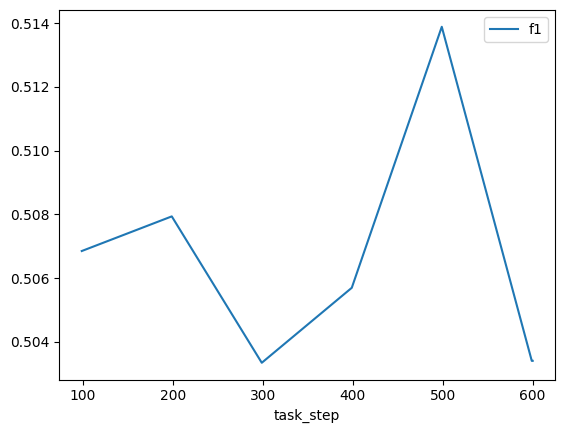

In [40]:
# Example visualizations of loss/validation curves
#alt.data_transformers.disable_max_rows()
TEST_TASK = TEST_TASK.replace("_",".")
filter = (df["task"]==TEST_TASK) & (df["model"]=="roberta") #& (df["global_step"]<5000)
df[filter].plot(x="task_step",y="f1")
df[(df["task"]==TEST_TASK)]

In [41]:
# doesnt show ... why ? interpreter problem ?
# alt.renderers.enable('default')

raw_loss = alt.Chart(df[filter]).mark_line().encode(
  x='task_step',# or global_step
  y='loss_val',
  color='model:N' # setup or model
)

raw_f1 = alt.Chart(df[filter & (df["f1"].notnull())]).mark_point().encode(
  x='task_step',# global_step
  y='f1',
  color='model:N'
)

f1_labels = raw_f1.mark_text(
    align="center",
    dy= -20
).encode(text=alt.Text("f1:Q",format=".1%"))

# rolling average 
avg_loss = alt.Chart(df[filter]).mark_line(color="green"
).transform_window(
    rolling_mean='mean(loss_val)',
    frame=[-10,0]
).encode(
    x='task_step',# global_step
    y='rolling_mean:Q',
    color="model:N"
    #color="task:N"
)

#alt.layer(avg_loss + raw_f1).interactive() #+ f1_labels
avg_loss | (raw_f1 + f1_labels)

/home/muller/miniconda3/envs/jiant3.8/lib/python3.8/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.HConcatChart(...)

In [18]:

filter = val_scores["task"].isin(pdtb_tasks)
print("===== Scores pdtb ========")
print("---mean=",val_scores[filter].groupby("model").mean()["f1"])
print("---std dev=",val_scores[filter].groupby("model").std()["f1"])
filter = ~(val_scores["task"].isin(pdtb_tasks))
print("===== Scores segmentation ========")
print("---mean=",val_scores[filter].groupby("model").mean()["f1"])
print("---std dev=",val_scores[filter].groupby("model").std()["f1"])

===== Scores pdtb ========
---mean= model
roberta    0.768595
Name: f1, dtype: float64
---std dev= model
roberta   NaN
Name: f1, dtype: float64
===== Scores segmentation ========
---mean= model
roberta          0.917076
roberta-large    0.890646
Name: f1, dtype: float64
---std dev= model
roberta          0.051306
roberta-large    0.057228
Name: f1, dtype: float64


/tmp/ipykernel_265737/1181446257.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("---mean=",val_scores[filter].groupby("model").mean()["f1"])
/tmp/ipykernel_265737/1181446257.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("---std dev=",val_scores[filter].groupby("model").std()["f1"])
/tmp/ipykernel_265737/1181446257.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("---mean=",val_scores[fil

In [84]:
# to compare multiple models across multiple datasets + CI
# better if averaged on multiple runs
# inspired from: https://altair-viz.github.io/gallery/grouped_bar_chart_with_error_bars.html
scores = alt.Chart().mark_bar().encode(
    x="model",
    y="f1",
    color="model"
)

error_bars = alt.Chart().mark_errorbar(extent='ci').encode(
    x='model',
    y='f1'
)
f1_labels = scores.mark_text(
    align="left",
    dy= -20, dx=-10
).encode(text=alt.Text("f1:Q",format=".1%"))


alt.layer(scores, error_bars, f1_labels,data=val_scores).facet(
    column='task:N'
).interactive()

/home/muller/miniconda3/envs/jiant3.8/lib/python3.8/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.FacetChart(...)